# Pandas Basics — More Useful Methods — Workbook

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [1]:
import pandas as pd

## Change Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [2]:
pd.options.display.max_rows = 200

## Get Data

For this notebook, we're going to read in a slightly less clean version of the Pudding data.

In [6]:
cd ..

/Users/melwalsh/info498a-au21-repo/03-Data-Analysis


In [7]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Salty.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [8]:
film_df.sample(5)

,script_id,imdb_character_name,words,gender,age,imdb_id,title,year,gross,proportion_of_dialogue
5286,1963,security guard,116,m,55.0,tt0112641,Casino,1995,84.0,0.001714
4377,1723,bruce banner,1305,m,45.0,tt0848228,The Avengers,2012,680.0,0.100928
14030,4626,goldar,135,m,40.0,tt0113820,Mighty Morphin Power Rangers: The Movie,1995,75.0,0.025559
14897,4976,auggie wren,4802,m,56.0,tt0114478,Smoke,1995,16.0,0.314473
12232,3984,judge charles m,281,m,73.0,tt0040202,Call Northside 777,1948,NaN,0.051902


Generate information about all the columns in the data 

In [9]:
film_df.describe()

,script_id,words,age,year,gross,proportion_of_dialogue
count,23052.000000,23052.000000,18266.000000,23052.000000,19390.000000,23052.000000
mean,4195.580904,907.870684,42.386839,1998.133828,106.805570,0.086512
std,2473.518048,1399.538583,59.714730,14.745342,145.992394,0.107740
min,280.000000,101.000000,3.000000,1929.000000,0.000000,0.001537
25%,2095.000000,193.000000,30.000000,1992.000000,22.000000,0.019771
50%,3694.000000,396.000000,39.000000,2001.000000,56.000000,0.042421
75%,6234.000000,980.000000,50.000000,2009.000000,136.000000,0.104166
max,9254.000000,28102.000000,2013.000000,2015.000000,1798.000000,0.923422


## Rename Columns

In [10]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

## Clean and Transform Data

### Pandas `.str` Methods

Remember all the special things that you can do with Python strings aka [string methods](https://melaniewalsh.github.io/Intro-Cultural-Analytics/Python/String-Methods.html)?

Pandas has special [Pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods), too. Many of them are very similar to Python string methods, except they will transform every single string value in a column, and we have to add `.str` to the method chain.

| **Pandas String Method** | **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| df['column_name']`.str.lower()`         | makes the string in each row lowercase                                                                                |
| df['column_name']`.str.upper()`         | makes the string in each row uppercase                                                |
| df['column_name']`.str.title()`         | makes the string in each row titlecase                                                |
| df['column_name']`.str.replace('old string', 'new string')`      | replaces `old string` with `new string` for each row |
| df['column_name']`.str.contains('some string')`      | tests whether string in each row contains "some string" |
| df['column_name']`.str.split('delim')`          | returns a list of substrings separated by the given delimiter |
| df['column_name']`.str.join(list)`         | opposite of split(), joins the elements in the given list together using the string                                                                        |
                                                            

For example, to transform every character's name in the "character" column from lowercase to title case, we can use `.str.title()` 

To transform every character's name in the "character" column to lowercase, we can use `.str.lower()`

In [11]:
film_df['character']

0                  betty
1        carolyn johnson
2                eleanor
3        francesca johns
4                  madge
              ...       
23047            maurice
23048    monsieur d'arqu
23049         mrs. potts
23050           wardrobe
23051         mrs. potts
Name: character, Length: 23052, dtype: object

In [12]:
film_df['character'].str.title()

0                  Betty
1        Carolyn Johnson
2                Eleanor
3        Francesca Johns
4                  Madge
              ...       
23047            Maurice
23048    Monsieur D'Arqu
23049         Mrs. Potts
23050           Wardrobe
23051         Mrs. Potts
Name: character, Length: 23052, dtype: object

The transformation above was temporary. Change the DataFrame column "character" to title case permanently.

In [13]:
film_df['character'] = film_df['character'].str.title()

## Filter with `.contains()`

We can use the `.str.contains()` to search for particular words or phrases in a column, such as "Star Wars."

In [25]:
star_wars_filter = film_df['title'].str.contains('star wars', case=False, na=False)

In [26]:
film_df[star_wars_filter]

,script_id,character,words,gender,age,imdb_id,title,release_year,gross,proportion_of_dialogue,gross_millions,gross_millions2
3017,1359,Admiral Ackbar,199,m,61.0,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,853.0,0.039096,8.530000e+08,8.530000e+08
3018,1359,Ben 'Obi-Wan' K,462,m,69.0,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,853.0,0.090766,8.530000e+08,8.530000e+08
3019,1359,C-3Po,881,m,37.0,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,853.0,0.173084,8.530000e+08,8.530000e+08
3020,1359,Darth Vader,381,m,48.0,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,853.0,0.074853,8.530000e+08,8.530000e+08
3021,1359,Han Solo,835,m,41.0,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,853.0,0.164047,8.530000e+08,8.530000e+08
3022,1359,Lando Calrissia,379,m,46.0,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,853.0,0.074460,8.530000e+08,8.530000e+08
3023,1359,Luke Skywalker,915,m,32.0,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,853.0,0.179764,8.530000e+08,8.530000e+08
3024,1359,Princess Leia,359,f,27.0,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,853.0,0.070530,8.530000e+08,8.530000e+08
3025,1359,The Emperor,516,m,39.0,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,853.0,0.101375,8.530000e+08,8.530000e+08
3026,1359,Yoda,163,m,19.0,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,853.0,0.032024,8.530000e+08,8.530000e+08


In [16]:
twilight_filter = film_df['title'].str.contains('Twilight')

In [17]:
film_df[twilight_filter]

,script_id,character,words,gender,age,imdb_id,title,release_year,gross,proportion_of_dialogue
11261,3621,Alice Cullen,146,f,21.0,tt1099212,Twilight,2008,231.0,0.010193
11262,3621,Angela,250,f,18.0,tt1099212,Twilight,2008,231.0,0.017453
11263,3621,Bella Swan,4934,f,18.0,tt1099212,Twilight,2008,231.0,0.344457
11264,3621,Billy Black,148,m,55.0,tt1099212,Twilight,2008,231.0,0.010332
11265,3621,Charlie Swan,1256,m,42.0,tt1099212,Twilight,2008,231.0,0.087685
11266,3621,Edward Cullen,3680,m,22.0,tt1099212,Twilight,2008,231.0,0.256911
11267,3621,Eric,308,m,27.0,tt1099212,Twilight,2008,231.0,0.021502
11268,3621,Esme Cullen,162,f,33.0,tt1099212,Twilight,2008,231.0,0.011310
11269,3621,Jacob Black,342,m,16.0,tt1099212,Twilight,2008,231.0,0.023876
11270,3621,James,778,m,26.0,tt1099212,Twilight,2008,231.0,0.054314


Make your own filter with `.str.contains()`

In [ ]:
new_filter = ...

In [ ]:
film_df[new_filter]

## Applying Functions

You can apply Python functions to DataFrames with multiple different methods. We will explore two of them here.

Let's say we want to transform the "gross" column, which reports how much money each film made, into a full number. Right now if a film made $2 million, it simply says `2.0`. But maybe we want it to say `20000000`.

In [18]:
def make_millions(number):
    new_number = number * 1000000
    return new_number

In [19]:
make_millions(2.0)

2000000.0

### Method 1

You can use regular Python to loop through the Series `film_df['gross']` and make a list with all your new values.

In [20]:
gross_in_millions = []

for gross in film_df['gross']:
    gross_mill = make_millions(gross)
    gross_in_millions.append(gross_mill)

Then you can add that list as a new column to the DataFrame.

In [21]:
film_df['gross_millions'] = gross_in_millions

### Method 2

You can directly apply a function to every row in a column (or Series) with a special Pandas methods called `.apply()`.

In [23]:
film_df['gross_millions2'] = film_df['gross'].apply(make_millions)

In [24]:
film_df

,script_id,character,words,gender,age,imdb_id,title,release_year,gross,proportion_of_dialogue,gross_millions,gross_millions2
0,280,Betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,0.048639,142000000.0,142000000.0
1,280,Carolyn Johnson,873,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,0.136534,142000000.0,142000000.0
2,280,Eleanor,138,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,0.021583,142000000.0,142000000.0
3,280,Francesca Johns,2251,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,0.352049,142000000.0,142000000.0
4,280,Madge,190,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,0.029715,142000000.0,142000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23047,9254,Maurice,1107,m,71.0,tt0101414,Beauty and the Beast,1991,452.0,0.108967,452000000.0,452000000.0
23048,9254,Monsieur D'Arqu,114,m,58.0,tt0101414,Beauty and the Beast,1991,452.0,0.011222,452000000.0,452000000.0
23049,9254,Mrs. Potts,564,f,66.0,tt0101414,Beauty and the Beast,1991,452.0,0.055517,452000000.0,452000000.0
23050,9254,Wardrobe,121,f,54.0,tt0101414,Beauty and the Beast,1991,452.0,0.011911,452000000.0,452000000.0


### Method 3

You can directly apply a function to an entire DataFrame with `.apply()` and `axis='columns'`.

In [28]:
def make_millions(df):
    new_number = df['gross'] * 1000000
    return new_number

In [31]:
film_df['gross_millions3'] = film_df.apply(make_millions, axis='columns')

In [32]:
film_df

,script_id,character,words,gender,age,imdb_id,title,release_year,gross,proportion_of_dialogue,gross_millions,gross_millions2,gross_millions3
0,280,Betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,0.048639,142000000.0,142000000.0,142000000.0
1,280,Carolyn Johnson,873,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,0.136534,142000000.0,142000000.0,142000000.0
2,280,Eleanor,138,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,0.021583,142000000.0,142000000.0,142000000.0
3,280,Francesca Johns,2251,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,0.352049,142000000.0,142000000.0,142000000.0
4,280,Madge,190,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,0.029715,142000000.0,142000000.0,142000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,9254,Maurice,1107,m,71.0,tt0101414,Beauty and the Beast,1991,452.0,0.108967,452000000.0,452000000.0,452000000.0
23048,9254,Monsieur D'Arqu,114,m,58.0,tt0101414,Beauty and the Beast,1991,452.0,0.011222,452000000.0,452000000.0,452000000.0
23049,9254,Mrs. Potts,564,f,66.0,tt0101414,Beauty and the Beast,1991,452.0,0.055517,452000000.0,452000000.0,452000000.0
23050,9254,Wardrobe,121,f,54.0,tt0101414,Beauty and the Beast,1991,452.0,0.011911,452000000.0,452000000.0,452000000.0


Let's transform the column `proportion_of_dialogue` into a percentage, e.g., .02 -> 2.

Make a Python function called `make_percent()` that will take in a number and then return that number mutlipled by 100.

In [ ]:
def ...

Make a new column "percentage_of_dialogue" by applying this function to the "proportion of dialogue" column.

In [ ]:
film_df['percentage_of_dialogue'] = ...

## More Useful Methods

### Make a Series into a DataFrame

Here's a Series:

In [33]:
film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          18500
10 Things I Hate About You    19680
12 Years a Slave              19628
12 and Holding                15968
127 Hours                      5145
                              ...  
Zero Effect                   13927
Zerophilia                    16686
Zodiac                        14656
eXistenZ                       9447
xXx                            8285
Name: words, Length: 1994, dtype: int64

You can make a Series object into a DataFrame object by using two square brackets instead of one.

In [34]:
film_df.groupby('title')[['words']].sum()

,words
title,
(500) Days of Summer,18500
10 Things I Hate About You,19680
12 Years a Slave,19628
12 and Holding,15968
127 Hours,5145
...,...
Zero Effect,13927
Zerophilia,16686
Zodiac,14656


But perhaps the most useful method, especially after grouping by a category, is to use `.reset_index()`. The index is "reset" to ascending numbers, and the groupby category becomes a regular column.

In [35]:
film_df.groupby('title')[['words']].sum().reset_index()

,title,words
0,(500) Days of Summer,18500
1,10 Things I Hate About You,19680
2,12 Years a Slave,19628
3,12 and Holding,15968
4,127 Hours,5145
...,...,...
1989,Zero Effect,13927
1990,Zerophilia,16686
1991,Zodiac,14656
1992,eXistenZ,9447


### Change Data Types

You can convert data types with `.astype()` ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)).

In [36]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23052 entries, 0 to 23051
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   script_id               23052 non-null  int64  
 1   character               23050 non-null  object 
 2   words                   23052 non-null  int64  
 3   gender                  23052 non-null  object 
 4   age                     18266 non-null  float64
 5   imdb_id                 23052 non-null  object 
 6   title                   23052 non-null  object 
 7   release_year            23052 non-null  int64  
 8   gross                   19390 non-null  float64
 9   proportion_of_dialogue  23052 non-null  float64
 10  gross_millions          19390 non-null  float64
 11  gross_millions2         19390 non-null  float64
 12  gross_millions3         19390 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 2.3+ MB


In [37]:
film_df['script_id'].astype('str')

0         280
1         280
2         280
3         280
4         280
         ... 
23047    9254
23048    9254
23049    9254
23050    9254
23051    9254
Name: script_id, Length: 23052, dtype: object

Try to convert "age" to an integer and see what happens...

In [38]:
film_df['age'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Pandas says that you cannot convert NaN values to integers. If we're ok with keeping the Nan values, we can simply choose to "ignore" the errors.

In [39]:
film_df['age'].astype(int, errors='ignore')

0        35.0
1         NaN
2         NaN
3        46.0
4        46.0
         ... 
23047    71.0
23048    58.0
23049    66.0
23050    54.0
23051    66.0
Name: age, Length: 23052, dtype: float64

In [40]:
pd.to_numeric(film_df['age'])

0        35.0
1         NaN
2         NaN
3        46.0
4        46.0
         ... 
23047    71.0
23048    58.0
23049    66.0
23050    54.0
23051    66.0
Name: age, Length: 23052, dtype: float64

Convert to a datetime data type

In [43]:
pd.to_datetime(film_df['release_year'], format='%Y')

0       1995-01-01
1       1995-01-01
2       1995-01-01
3       1995-01-01
4       1995-01-01
           ...    
23047   1991-01-01
23048   1991-01-01
23049   1991-01-01
23050   1991-01-01
23051   1991-01-01
Name: release_year, Length: 23052, dtype: datetime64[ns]

In [49]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Salty.csv', delimiter=",", encoding='utf-8',
                      parse_dates=['year'])
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23052 entries, 0 to 23051
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   script_id               23052 non-null  int64         
 1   imdb_character_name     23050 non-null  object        
 2   words                   23052 non-null  int64         
 3   gender                  23052 non-null  object        
 4   age                     18266 non-null  float64       
 5   imdb_id                 23052 non-null  object        
 6   title                   23052 non-null  object        
 7   year                    23052 non-null  datetime64[ns]
 8   gross                   19390 non-null  float64       
 9   proportion_of_dialogue  23052 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 1.8+ MB


In [50]:
film_df

,script_id,imdb_character_name,words,gender,age,imdb_id,title,year,gross,proportion_of_dialogue
0,280,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995-01-01,142.0,0.048639
1,280,carolyn johnson,873,f,NaN,tt0112579,The Bridges of Madison County,1995-01-01,142.0,0.136534
2,280,eleanor,138,f,NaN,tt0112579,The Bridges of Madison County,1995-01-01,142.0,0.021583
3,280,francesca johns,2251,f,46.0,tt0112579,The Bridges of Madison County,1995-01-01,142.0,0.352049
4,280,madge,190,f,46.0,tt0112579,The Bridges of Madison County,1995-01-01,142.0,0.029715
...,...,...,...,...,...,...,...,...,...,...
23047,9254,maurice,1107,m,71.0,tt0101414,Beauty and the Beast,1991-01-01,452.0,0.108967
23048,9254,monsieur d'arqu,114,m,58.0,tt0101414,Beauty and the Beast,1991-01-01,452.0,0.011222
23049,9254,mrs. potts,564,f,66.0,tt0101414,Beauty and the Beast,1991-01-01,452.0,0.055517
23050,9254,wardrobe,121,f,54.0,tt0101414,Beauty and the Beast,1991-01-01,452.0,0.011911


### Binning

You can use `pd.cut()` to bin values ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)).

In [44]:
pd.cut(film_df['age'], bins=[0, 25, 50, 75, 100], labels= ['0-25', '25-50', '50-75', '75-100'])

0        25-50
1          NaN
2          NaN
3        25-50
4        25-50
         ...  
23047    50-75
23048    50-75
23049    50-75
23050    50-75
23051    50-75
Name: age, Length: 23052, dtype: category
Categories (4, object): ['0-25' < '25-50' < '50-75' < '75-100']

In [45]:
binned_age = pd.cut(film_df['age'], bins=[0, 25, 50, 75, 100], labels= ['0-25', '25-50', '50-75', '75-100'])

<AxesSubplot:>

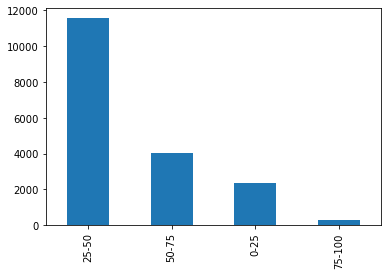

In [46]:
binned_age.value_counts().plot(kind='bar')

<AxesSubplot:>

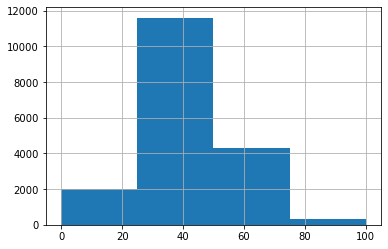

In [47]:
film_df['age'].hist(bins=[0, 25, 50, 75, 100])